In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples = np.random.normal(size=10000)

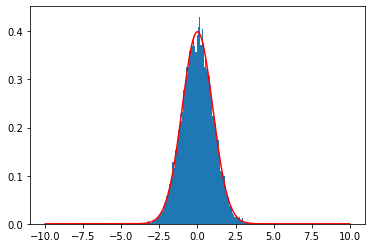

In [3]:
x = np.linspace(-10, 10, 1000)
y = np.exp(-x**2. / 2.) / np.sqrt(2.*np.pi)
plt.hist(samples, density=True, bins=100)
plt.plot(x, y, color='r')

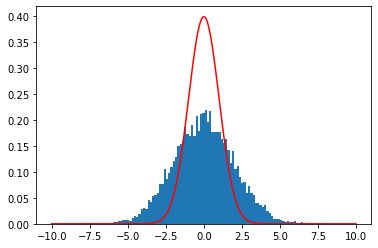

In [4]:
samples = np.random.normal(scale=2., size=10000)
plt.hist(samples, density=True, bins=100)
plt.plot(x, y, color='r')

# Sampling from an arbitrary pdf

For when `scipy.rv_continuous` is overkill…

In [2]:
from scipy.interpolate import interp1d

In [3]:
def sample_cdf(pdf, xmin, xmax, n_bins=1000, log=False):
    if log:
        binner = np.geomspace
    else:
        binner = np.linspace
    edges = binner(xmin, xmax, n_bins)
    bins = np.vstack((edges[:-1], edges[1:])).T
    centers = np.mean(bins, axis=1)
    widths = bins[:, 1] - bins[:, 0]
    pdf_samples = pdf(centers)
    cdf_samples = np.cumsum(pdf_samples * widths)
    cdf_samples /= cdf_samples[-1]
    return np.vstack((centers, cdf_samples)).T

def inverse_cdf(*args, **kwargs):
    iy, ix = sample_cdf(*args, **kwargs).T
    return interp1d(ix, iy, fill_value='extrapolate')

def sample(icdf, n_samples):
    range_samples = np.random.uniform(size=n_samples)
    return icdf(range_samples)

In [4]:
rho_sp   = 226              # solar mass / pc**3
gamma_sp = 7/3              # slope parameter


# r_in   = 5.906*10**7      # meters, ASSUMING gamma_sp = 7/3
r_in     = 1.914*10**-9     # "Parsecs"

# r_sp   = 3.61324*10**16   # meters, ASSUMING gamma_sp = 7/3
r_sp     = 1.17097          # "Parsecs"

In [7]:
%%time
def pdf(r):
    rho_dm = rho_sp*(r_sp/r)**gamma_sp
    return rho_dm*r**2
    
icdf = inverse_cdf(pdf, 10, 1e3)
samples = sample(icdf, 1000000)

Wall time: 191 ms


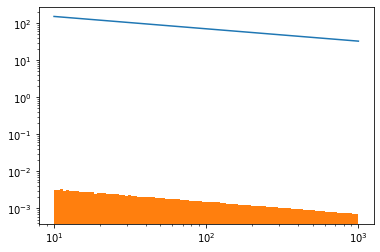

In [8]:
plt.loglog()
x = np.geomspace(10, 1e3, 100)
plt.plot(x, pdf(x))
plt.hist(samples, density=True, bins=np.geomspace(10, 1e3, 100));

I had not bothered to normalize the input pdf, so there is a constant factor between my histogram and the pdf. (Remember, a shift on a log-log plot is a constant multiplicative factor.) But there is no need to normalize in order for this code to work.